<a href="https://colab.research.google.com/github/b-whitman/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/Benjamin_Whitman_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
pd.read_csv?

In [34]:
# Read persons.csv, and fix headers
df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv', index_col=0)
df.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [0]:
plt.scatter?

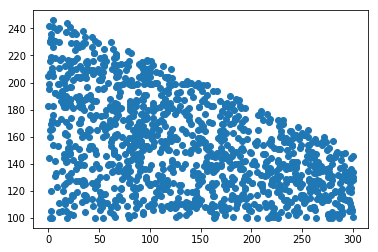

In [86]:
time_weight_plot = plt.scatter(df['exercise_time'], df['weight'])
# This seems like a pretty clear relationship right off the bat!
# The more a person exercises, the less he or she weighs.
# TODO: Add axis labels

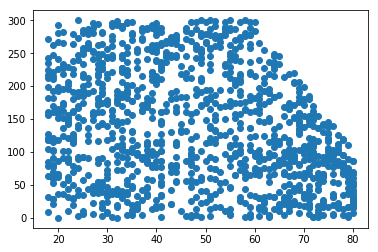

In [80]:
plt.scatter(df['age'], df['exercise_time'])
# This also tells us about how the data is structured.
# People start exercising less around age 60, tapering off until nobody at age 80 exercises more than ~100 mins.

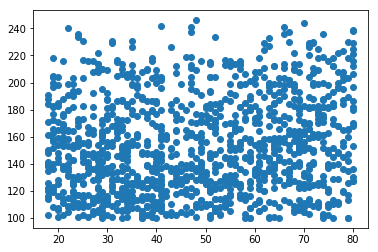

In [82]:
plt.scatter(df['age'], df['weight'])
# Curiously, there's a less distinct relationship between age and weight.
# There's a slight increase starting around 60, but nothing as stark as previous 2 graphs.

In [0]:
pd.crosstab?

In [0]:
pd.cut?

In [0]:
#!pip install pandas==0.23.4

In [0]:
# Create bins for all features
age_bins = pd.cut(df['age'], 5, precision=0)
weight_bins = pd.cut(df['weight'], 5, precision=0)
exercise_bins = pd.cut(df['exercise_time'], 5, precision=0)

In [87]:
# People seem to get heavier as they get older
weight_age_ct = pd.crosstab(age_bins, weight_bins, normalize='columns')
weight_age_ct

weight,"(100.0, 129.0]","(129.0, 158.0]","(158.0, 188.0]","(188.0, 217.0]","(217.0, 246.0]"
age,,,,,
"(18.0, 30.0]",0.213333,0.256716,0.189922,0.189944,0.132075
"(30.0, 43.0]",0.277333,0.185075,0.189922,0.173184,0.132075
"(43.0, 55.0]",0.208000,0.185075,0.189922,0.145251,0.150943
"(55.0, 68.0]",0.141333,0.211940,0.174419,0.245810,0.169811
"(68.0, 80.0]",0.160000,0.161194,0.255814,0.245810,0.415094


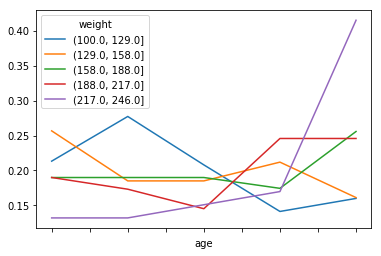

In [88]:
weight_age_ct.plot()

In [67]:
pd.crosstab(age_bins, exercise_bins, normalize='columns')

exercise_time,"(-0.0, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
age,,,,,
"(18.0, 30.0]",0.187050,0.145570,0.242152,0.317708,0.225131
"(30.0, 43.0]",0.187050,0.174051,0.188341,0.244792,0.298429
"(43.0, 55.0]",0.147482,0.132911,0.174888,0.177083,0.350785
"(55.0, 68.0]",0.165468,0.224684,0.179372,0.213542,0.125654
"(68.0, 80.0]",0.312950,0.322785,0.215247,0.046875,0.000000


In [59]:
# Looks like nobody in the highest age bin exercised 4-5 hours?
ct = pd.crosstab(exercise_bins, [age_bins, weight_bins], normalize='index')
ct

age              (18.0, 30.0]      ...         (68.0, 80.0]
weight         (100.0, 129.0]      ...       (217.0, 246.0]
exercise_time                      ...                     
(-0.0, 60.0]         0.035971      ...             0.053957
(60.0, 120.0]        0.028481      ...             0.022152
(120.0, 180.0]       0.076233      ...             0.000000
(180.0, 240.0]       0.098958      ...             0.000000
(240.0, 300.0]       0.130890      ...             0.000000

[5 rows x 25 columns]

In [0]:
# Create subsets
ct_youngest = ct.iloc[:, [0,1,2,3,4]]
ct_second_young = ct.iloc[:, [5,6,7,8,9]]
ct_middle_age = ct.iloc[:, [10,11,12,13,14]]
ct_second_old = ct.iloc[:, [15,16,17,18,19]]
ct_oldest = ct.iloc[:, [20,21,22,23,24]]

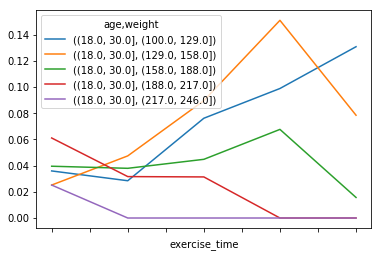

In [64]:
ct_young.plot()
# Among the youngest cohort, only the very lowest exercisers are in the highest weight bracket.
# As exercise time increases, chance of being in two lowest weight brackets increases.

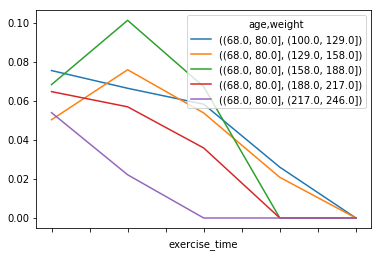

In [66]:
ct_oldest.plot()
# This may be deceptive because older people just tend to exercise less in general.

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

The variables are continuous.

2.  What are the relationships between the variables?

Exercise time decreases as age increases. Weight decreases as exercise time increases.

3.  Which relationships are "real", and which spurious?

There sometimes appears to be a relationship between age and weight, and sometimes not, in the crosstables and corresponding graphs. But a scatter plot shows no relationship, so it seems like there's no relationship.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)